# PCA-차원축소 사례(수기 숫자 데이터 불러오기)

In [1]:
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

In [2]:
# 숫자 데이터셋의 첫 25개 숫자를 로드하고 표시
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


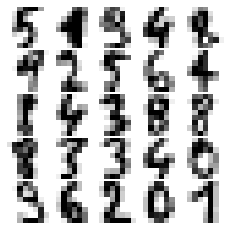

In [8]:
j=1
np.random.seed(1)
fig = pylab.figure(figsize=(3,3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in np.random.choice(digits.data.shape[0], 25):
  pylab.subplot(5,5,j), pylab.axis('off')
  pylab.imshow(np.reshape(digits.data[i,:], (8,8)), cmap='binary')
  j += 1

pylab.show()

In [10]:
from sklearn.decomposition import PCA

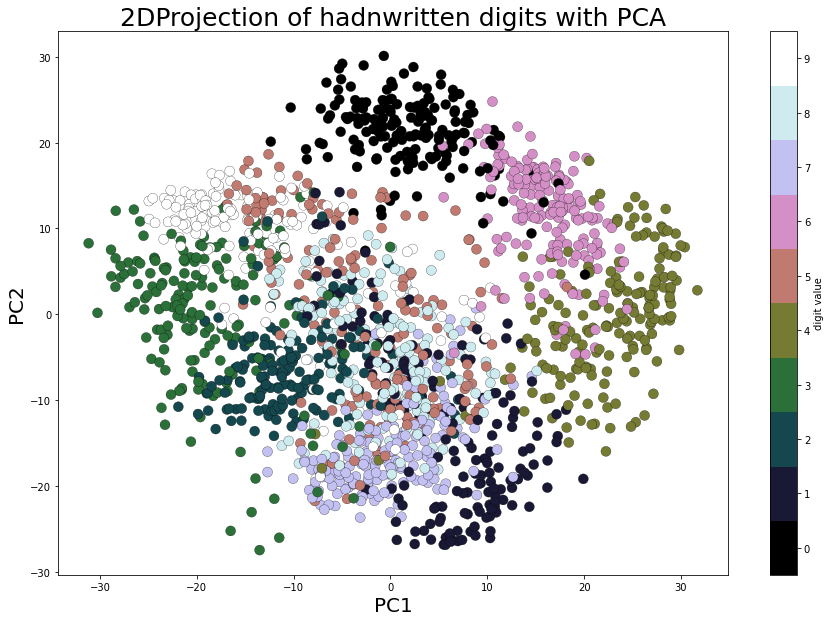

In [11]:
pca_digits = PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data)

pylab.figure(num='', figsize=(15,10))
pylab.scatter(digits.data_proj[:,0], digits.data_proj[:, 1], lw=0.25, \
              c=digits.target, edgecolor='k', s=100, \
              cmap=pylab.cm.get_cmap('cubehelix', 10))
pylab.xlabel('PC1', size=20), pylab.ylabel('PC2', size=20)
pylab.title('2DProjection of hadnwritten digits with PCA', size=25)
pylab.colorbar(ticks=range(10), label='digit value')
pylab.clim(-0.5, 9.5)
pylab.show()

# PCA-차원축소 사례(Iris 데이터 불러오기)

1단계) 데이터셋 불러오기 및 시각화

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print(iris)

# 데이터를 더 쉽게 다루기 위해서 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data,
                      columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)
print(irisDF)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

2단계) 데이터셋 군집화(k=3, k-means++) 및 결과보기

In [13]:
# kmeans 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

# kmeans.labels_ 속성으로 각 데이터가 어떤 중심에 속하는지 확인하기
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


3단계) 군집화 결과의 정확성 확인하기

In [14]:
# 군집화가 효과적으로 되어있는지 확인하기
# 이 iris 데이터 경우에는 각 데이터의 타겟 정보가 있어 확인 가능함
# iris의 타겟정보와 irisDF의 라벨정보를 비교해보기
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


4단계) 군집화 결과의 시각화(차원축소 필요)

In [15]:
# 군집화 결과의 시각화
# 2차 평면 시각화를 위해서 데이터의 차원(irisDF 경우 4차원임)을 축소할 필요 있음
# PCA(주성분분석)을 이용해 차원축소함

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


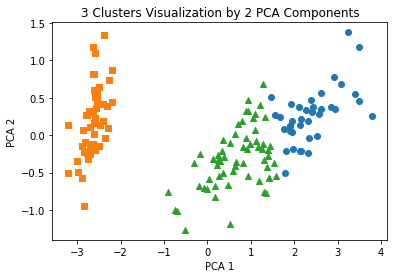

In [16]:
# 주성분분석 PCA로 차원 축소한 결과를 2차평면에 나타내기

# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

# 차트 나타내기
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()